---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Andrés Barrantes Silman**

- Carné: **B81020**

- Grupo: **2**

- Estudiante: **Max Yamber Leiva Zúñiga**

- Carné: **B84260**

- Grupo: **1**

- 
# `P5` - *Procesos M/M/s*

> El caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.

---

### (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.


Primeramente se procede a calcular la probabilidad de que hayan más de 100 personas en fila para la campaña de vacunación y por lo tanto se procede de la siguiente manera:

$$
P( \text{101 o más personas en fila} ) = \sum_{i=5}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{100} (1 - \rho) \rho^i = \rho^{101}
$$

De donde se sabe que $\rho = \frac{\lambda}{s\nu}$ por lo tanto de esta ecuación las únicas variables que no conocemos es el número de servidores s y  $\rho$, pero s es el dato que andamos buscando para el primer inciso, tambien conocemos que $\lambda = 7$ y $v$ es $0.25$, por lo tanto se tiene que:

$$
\begin{equation}
\rho =  \frac{\lambda}{\nu s}
\end{equation}
$$

Sustituyendo los valores se procede a resolver de la siguiente manera:


$$
\begin{equation}
\rho =  \frac{7}{0.25 s}
\end{equation}
$$

$$
\begin{equation}
\rho =  \frac{28}{s}
\end{equation}
$$

Por lo tanto sabiendo esto se analiza el caso que no se debe cumplir el 5% del tiempo, este caso se define por medio de la siguiente expresión:

$$
P( \text{101 o más personas en fila} ) = 1 - \sum_{i=0}^{100} (1 - \rho) \rho^i = \rho^{101}
$$

Donde se sustituyen los valores de $\rho$ y se tiene que 
$$
\left(\frac{28}{s}\right)^101 \leq 0.05
$$

Y se despeja $s$:

$$
s\geq28\cdot\sqrt[101]{\frac{1}{0.05}}
$$

Alternativamente, se puede calcular la sumatoria anterior por medio de Wolfram Mathematica utilizando el siguiente código:


`Solve[Sum[(1 - 28/s)*(28/s)^(k), {k, 0, 100}] == 0.05, s, Reals]`


Con esto se tiene que el resultado del número de servidores es de:

$$ s \geq 28.843 \implies s = 29$$

Esto cumple con el criterio de estabilidad, que es $\frac{\lambda}{\nu s}<1$, de hecho, si se despeja $s$ directamente de ahí se obtiene que el mínimo de servidores para que el sistema sea estable es de 28 servidores.

---


### (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

Parámetro lambda = 7.0
Parámetro nu = 7.25
Tiempo con más de 100 solicitudes en fila:
	 0.26%
	 Sí cumple con la especificación.
Simulación es equivalente a 126.07 horas.


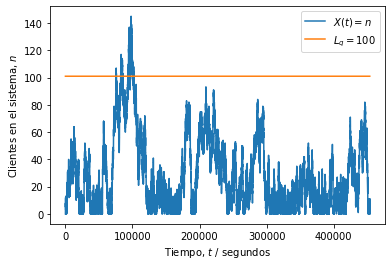

Parámetro lambda = 7.0
Parámetro nu = 7.25
Tiempo con más de 100 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 126.09 horas.


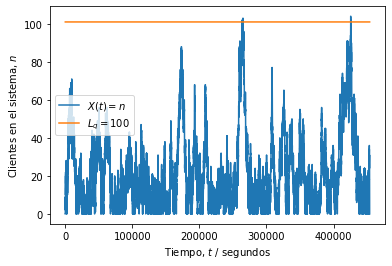

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
for i in range(0,2,1):
    # Número de clientes
    N = 50000

    # Parámetro de llegada (clientes/segundos)
    lam = 7/60

    # Parámetro de servicio (servicios/segundos)
    nu = (0.25*29)/60 #Es la tasa de atencion contemplando los multiples servidores

    # Distribución de los tiempos de llegada entre cada cliente
    X = stats.expon(scale = 1/lam)

    # Distribución de los tiempos de servicio a cada cliente
    Y = stats.expon(scale = 1/nu)

    # Intervalos entre llegadas (segundos desde último cliente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')

    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)

    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')

    # Inicialización del tiempo de inicio y fin de atención
    inicio = t_llegadas[0]          # primera llegada
    fin = inicio + t_servicio[0]    # primera salida

    # Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
    t_atencion = [inicio]
    for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

    # Asignación de eventos de llegada (+1) y salida (-1) de clientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1

    # Cantidad de servidores
    servidores = 29

    # Umbral de P o más personas en sistema (hay P - s en fila)
    P = 101+servidores

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)

    # Inicialización de estado n
    n = 0

    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P: 
            exceso += 1

    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)

    # Resultados
    print('Parámetro lambda =', str(lam*60))
    print('Parámetro nu =', str(nu*60))
    print('Tiempo con más de {} solicitudes en fila:'.format(P-(servidores+1)))
    print('\t {:0.2f}%'.format(100*fraccion))
    if fraccion <= 0.05:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-(servidores))*np.ones(t.shape))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P-(servidores+1))))
    plt.ylabel('Clientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    # plt.xlim((0, 28800))
    plt.show()